# Import

In [1]:
import os
import pydub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Steps taken before this experiment
Found the ground truth bpm of 'Never gonna give you up' and stored it in a text document along with the song name. I will plan to store these with each album, but for now ground truths will be labeled with **GT**

# Current Proposed Methods
- Low Pass filter and find peaks in bass
- Calculate the entropy of music
- Perform filtering on all of it
# Previous Publications of interest
- https://www.researchgate.net/publication/228987153_Detection_of_Spirited_Incidental_Music_in_Movies

# Idea 1: Calculate Peaks by filtering amplitude

## Load song information from txt

In [2]:
# State path to text file
gt_file_path = '../../Artists/Rick Astley/NotLabeled/Rick_Astley_BPM_GT.txt'
# Check to see if it exists
os.path.exists(gt_file_path)

True

In [3]:
# Load it into a pandas dataframe
df = pd.read_csv(gt_file_path)
df.head()

,Song,BPM
0,Rick Astley - Never Gonna Give You Up (Officia...,113


## Load song

In [4]:
song_path = '../../Artists/Rick Astley/NotLabeled/Rick Astley - Never Gonna Give You Up (Official Music Video).mp3'
os.path.exists(song_path)

True

In [5]:
song = pydub.AudioSegment.from_mp3(song_path)

## Write a function to remove silence from the sound clip

In [6]:
from pydub.silence import detect_nonsilent

def remove_sil(sound):
    non_sil_times = detect_nonsilent(sound, min_silence_len=50, silence_thresh=sound.dBFS * 1.5)
    if len(non_sil_times) > 0:
        non_sil_times_concat = [non_sil_times[0]]
        if len(non_sil_times) > 1:
            for t in non_sil_times[1:]:
                if t[0] - non_sil_times_concat[-1][-1] < 200:
                    non_sil_times_concat[-1][-1] = t[1]
                else:
                    non_sil_times_concat.append(t)
        non_sil_times = [t for t in non_sil_times_concat if t[1] - t[0] > 350]
        return(sound[non_sil_times[0][0]: non_sil_times[-1][1]])


## Get Amplitude Data

In [7]:
def get_amplitudes(track, interval=5):
    '''
    Inputs:
        - track: a pydub audio segmentation file
        - interval: sampling rate of the track
    
    Ouputs
        - times_wanted
        - amplitudes
    '''
    amplitudes = []
    track_length = len(track)
    times_wanted = np.arange(0, track_length, interval*1000)

    for x in times_wanted:
        amplitude = track[x].max
        amplitudes.append(amplitude)

    return(times_wanted, amplitudes)

## Look at just a slice of the song


In [79]:
duration = 120 # in seconnds
time, amps = get_amplitudes(song, 1)
time = time[0:duration]
amps = amps[0:duration]
print(time)
print(amps)

[     0   1000   2000   3000   4000   5000   6000   7000   8000   9000
  10000  11000  12000  13000  14000  15000  16000  17000  18000  19000
  20000  21000  22000  23000  24000  25000  26000  27000  28000  29000
  30000  31000  32000  33000  34000  35000  36000  37000  38000  39000
  40000  41000  42000  43000  44000  45000  46000  47000  48000  49000
  50000  51000  52000  53000  54000  55000  56000  57000  58000  59000
  60000  61000  62000  63000  64000  65000  66000  67000  68000  69000
  70000  71000  72000  73000  74000  75000  76000  77000  78000  79000
  80000  81000  82000  83000  84000  85000  86000  87000  88000  89000
  90000  91000  92000  93000  94000  95000  96000  97000  98000  99000
 100000 101000 102000 103000 104000 105000 106000 107000 108000 109000
 110000 111000 112000 113000 114000 115000 116000 117000 118000 119000]
[0, 2296, 18270, 4473, 7700, 6504, 9013, 8865, 4208, 4089, 6064, 8152, 4421, 5101, 10295, 5749, 10250, 4851, 7643, 9723, 14007, 11524, 3053, 7443, 

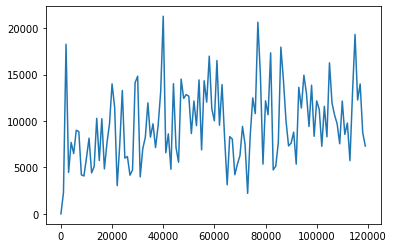

In [80]:
plt.figure()
plt.plot(time, amps)


In [81]:
## Take the derivative of the curve
diff_time = np.diff(time)
diff_amps = np.diff(amps)
print(time)
print(diff_time)
print(amps)
print(diff_amps)

[     0   1000   2000   3000   4000   5000   6000   7000   8000   9000
  10000  11000  12000  13000  14000  15000  16000  17000  18000  19000
  20000  21000  22000  23000  24000  25000  26000  27000  28000  29000
  30000  31000  32000  33000  34000  35000  36000  37000  38000  39000
  40000  41000  42000  43000  44000  45000  46000  47000  48000  49000
  50000  51000  52000  53000  54000  55000  56000  57000  58000  59000
  60000  61000  62000  63000  64000  65000  66000  67000  68000  69000
  70000  71000  72000  73000  74000  75000  76000  77000  78000  79000
  80000  81000  82000  83000  84000  85000  86000  87000  88000  89000
  90000  91000  92000  93000  94000  95000  96000  97000  98000  99000
 100000 101000 102000 103000 104000 105000 106000 107000 108000 109000
 110000 111000 112000 113000 114000 115000 116000 117000 118000 119000]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000

[  2.296  15.974 -13.797   3.227  -1.196   2.509  -0.148  -4.657  -0.119
   1.975   2.088  -3.731   0.68    5.194  -4.546   4.501  -5.399   2.792
   2.08    4.284  -2.483  -8.471   4.39    5.854  -7.287   0.171  -2.007
   0.568   9.398   0.692 -10.842   3.025   1.237   3.709  -3.691   1.433
  -2.561   2.354   3.624   8.172 -14.704   2.037  -3.812   9.214  -6.869
  -1.595   8.962  -2.075   0.402  -0.171  -4.024   3.504  -2.656   4.93
  -7.534   7.437  -2.298   4.956  -5.684  -1.281   6.489  -6.969   4.374
  -5.742  -5.041   5.181  -0.262  -3.837   1.133   0.916   3.15   -1.938
  -5.269   6.185   4.098  -1.698   9.843  -5.728  -9.556   6.83   -1.504
   6.662 -12.603   0.404   2.541  10.275  -3.563  -4.351  -2.725   0.296
   1.186  -3.44    8.264  -2.227   3.535  -1.965  -3.558   4.442  -5.497
   3.814  -0.923  -3.969   4.308  -3.289   7.968  -4.334  -1.298  -0.932
  -2.153   4.601  -3.591   1.225  -4.05    7.227   6.37   -7.068   1.724
  -5.239  -1.439]


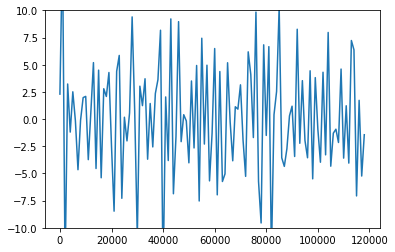

In [82]:
plt.figure()
deriv = diff_amps/diff_time
plt.plot(time[:-1], deriv)
plt.ylim(-10,10)
print(deriv)

In [83]:
# Perform Thresholding
times_at_beats = []
last_amp = 1
for instance, amp in zip(time[:-1], deriv):
    if amp/abs(amp) != last_amp/abs(last_amp):
        times_at_beats.append(instance)
print(times_at_beats)

# Calculate time between beats
times_between_beats = np.diff(times_at_beats)/1000
print(times_between_beats)

# Calculate bpm
print('Average: ' + str(np.average(times_between_beats)))
print('Median: ' + str(np.median(times_between_beats)))

[2000, 4000, 6000, 7000, 8000, 11000, 14000, 16000, 20000, 21000, 24000, 26000, 30000, 34000, 36000, 40000, 42000, 44000, 45000, 47000, 49000, 50000, 52000, 54000, 56000, 58000, 59000, 61000, 63000, 64000, 66000, 67000, 71000, 72000, 75000, 77000, 78000, 80000, 82000, 86000, 87000, 88000, 91000, 93000, 95000, 96000, 98000, 100000, 101000, 103000, 105000, 106000, 107000, 108000, 110000, 112000, 115000, 117000, 118000]
[2. 2. 1. 1. 3. 3. 2. 4. 1. 3. 2. 4. 4. 2. 4. 2. 2. 1. 2. 2. 1. 2. 2. 2.
 2. 1. 2. 2. 1. 2. 1. 4. 1. 3. 2. 1. 2. 2. 4. 1. 1. 3. 2. 2. 1. 2. 2. 1.
 2. 2. 1. 1. 1. 2. 2. 3. 2. 1.]
Average: 2.0
Median: 2.0


In [84]:
1/np.average(times_between_beats) * 60

30.0

## Attempt to remove silent parts of the track

In [24]:
times, amps = get_amplitudes(song,1)

# get max time for x limit
max_x = max(times)
print(max_x)

# get max amps so that we can set a max y on graph
max_y = max(amps)
print(max_y)

212000
21292


## Plot before and after silence removal

(0.0, 212000.0)

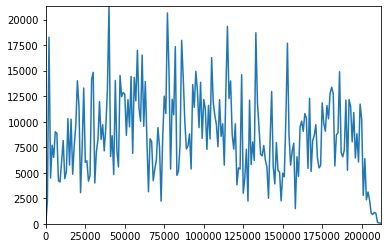

In [32]:
plt.figure()
plt.plot(times, amps)
plt.ylim(0, max_y)
plt.xlim(0, max_x)


(0.0, 212000.0)

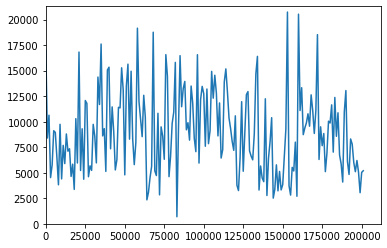

In [28]:
# remove silence from song
song_cut_down = remove_sil(song)
times_subsilence, amps_subsilence = get_amplitudes(song_cut_down,1)

# plot
plt.figure()
plt.plot(times_subsilence, amps_subsilence)
plt.ylim(0, max_y)
plt.xlim(0, max_x)

## Perform Thresholding

In [463]:
# Prefiltering
amps = [0 if amps_ == float('-inf') else amps_ for amps_ in amps]
# Get max
max_amp = np.max(amps)
# Get min
min_amp = np.min(amps)
# Get average
avg_amp = np.average(amps)
# Print
print(max_amp)
print(min_amp)
print(avg_amp)

20735
690
8968.460396039603


In [471]:
# Calculate 75% threshold
# seventyfive = int(0.35*max_amp)
seventyfive = 10000
print(seventyfive)

10000


In [472]:
# Apply it 
print(amps[5:20])
amps = [0 if amps_ < seventyfive else amps_ for amps_ in amps]
print(amps[5:20])

[9114, 8954, 0, 0, 9742, 0, 7680, 0, 8797, 0, 7349, 0, 0, 0, 10294]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10294]


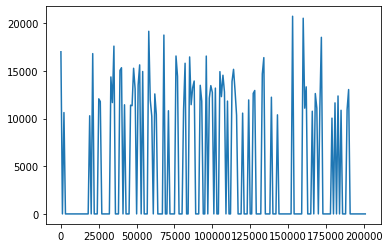

In [473]:
plt.plot(times, amps)

## Calculate the number of seconds between loud beats

In [474]:
beat_occur_times = []
i = 0
for time,amp in zip(times,amps):
    if amp != 0:
        beat_occur_times.append(time/1000)
    i+=1

print(beat_occur_times[0:50])

[0.0, 2.0, 19.0, 21.0, 25.0, 26.0, 33.0, 34.0, 35.0, 39.0, 40.0, 42.0, 46.0, 47.0, 48.0, 49.0, 51.0, 52.0, 54.0, 58.0, 59.0, 60.0, 62.0, 63.0, 68.0, 71.0, 76.0, 77.0, 81.0, 82.0, 85.0, 86.0, 87.0, 88.0, 92.0, 93.0, 96.0, 98.0, 99.0, 100.0, 102.0, 105.0, 106.0, 107.0, 108.0, 110.0, 113.0, 114.0, 115.0, 116.0]


In [475]:
delta_time = []
for x,y in zip(beat_occur_times[0::], beat_occur_times[1::]):
    delta_time.append(y-x)

print(delta_time[0:10])
np.average(delta_time)

[2.0, 17.0, 2.0, 4.0, 1.0, 7.0, 1.0, 1.0, 4.0, 1.0]


2.638888888888889

In [476]:
print(np.average(delta_time))
print(np.average(delta_time)*60)
print(np.median(delta_time))
print(np.median(delta_time)*60)


2.638888888888889
158.33333333333334
2.0
120.0


In [478]:
### Write a loop to find the best filter
list_frequencies = np.arange(1000, 20000, 1000)
for x in list_frequencies:
    times, amps = get_amplitudes(song,1)
    
    
    

array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000,
       19000])

### Two methods: 1) compare the length of loud amplitudes

In [289]:
len(song)/len(beat_occur_times)

1060.455